# Carbon Dioxide Emissions Impact

### Objective:
 ##### To develop a machine learning model to predict the carbon dioxide emissions per capita of countries using historical environmental, energy, and socio-economic indicators. By leveraging cross-country data, this project aims to identify the key drivers of CO₂ emissions and support efforts to monitor and reduce carbon footprints globally..
  
#### Key Goals
  ###### Identify Significant Factors
Analyze and determine which environmental, energy, and socio-economic features significantly influence a country’s carbon dioxide emissions per capita.
  ###### Build Predictive Models
Develop machine learning regression models that accurately predict CO₂ emissions per capita based on these independent variables..
  ###### Evaluate Model Performance
Compare different models (e.g., Linear Regression, Random Forest, Ridge Regression) to identify the most accurate and robust model, enabling reliable forecasts and actionable insights for climate policy and sustainable development planning.



### Data Collection

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from scipy.stats import uniform
import joblib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [5]:
data=pd.read_csv('D241.csv')

In [6]:
df=pd.DataFrame(data)

In [7]:
df.head(10)

,Location,Primary energy supply Fossil fuels (% of total) 2012,Primary energy supply Renewable sources (% of total) 2012,Electrification rate Total (% of population) 2012,Electrification rate Rural (% of rural population) 2012,Carbon dioxide emissions per capita (tonnes) 2011,Carbon dioxide emissions per capita Average annual growth (%) 1970/2011,Natural resource depletion (% of GNI) 2008Ð2013,Forest area (% of total land area) 2012,Natural resources (% change) 1990/2012,Fresh water withdrawals (% of total renewable water resources) 2005Ð2014,"Deaths of children under age 5 due to Outdoor air pollution (per 100,000 children under age 5) 2008","Deaths of children under age 5 due to Indoor air pollution (per 100,000 children under age 5) 2004","Deaths of children under age 5 due to Poor water, sanitation or hygiene (per 100,000 children under age 5) 2004",Population living on degraded land (%) 2010,Population affected by Natural disasters (average annual per million people) 2005/2014
0,Afghanistan,NaN,NaN,43.0,32.0,0.4,3.3,1.2,2.1,0.0,NaN,21.0,"1,183","1,405",11.0,17311.0
1,Albania,60.5,26.6,100.0,100.0,1.6,-0.3,3.5,28.2,-1.9,4.3,0.0,5,50,5.7,20568.0
2,Algeria,99.9,0.1,100.0,100.0,3.2,3.8,18.0,0.6,-11.6,NaN,1.0,5,101,28.8,343.0
3,Andorra,NaN,NaN,100.0,100.0,6.3,NaN,NaN,34.0,0.0,NaN,0.0,0,0,NaN,NaN
4,Angola,39.3,60.7,37.0,6.0,1.5,2.9,31.0,46.7,-4.5,0.5,11.0,"1,073","1,266",3.3,13473.0
5,Antigua and Barbuda,NaN,NaN,90.9,79.8,5.8,-0.6,NaN,22.3,-4.9,8.5,0.0,1,0,NaN,35508.0
6,Arab States,96.3,3.2,86.9,74.2,4.9,-1.6,15.3,5.9,-22.6,NaN,6.0,76,219,24.3,NaN
7,Argentina,89.7,9.3,99.8,95.8,4.7,1.0,3.1,10.6,-16.9,4.3,0.0,0,3,1.7,1667.0
8,Armenia,71.5,32.7,100.0,100.0,1.7,NaN,2.2,8.9,-26.9,37.9,2.0,17,65,9.6,2549.0
9,Australia,95.4,4.6,100.0,100.0,16.5,1.1,3.8,19.2,-4.6,3.9,0.0,0,0,9.0,1337.0


In [8]:
df.tail(5)

,Location,Primary energy supply Fossil fuels (% of total) 2012,Primary energy supply Renewable sources (% of total) 2012,Electrification rate Total (% of population) 2012,Electrification rate Rural (% of rural population) 2012,Carbon dioxide emissions per capita (tonnes) 2011,Carbon dioxide emissions per capita Average annual growth (%) 1970/2011,Natural resource depletion (% of GNI) 2008Ð2013,Forest area (% of total land area) 2012,Natural resources (% change) 1990/2012,Fresh water withdrawals (% of total renewable water resources) 2005Ð2014,"Deaths of children under age 5 due to Outdoor air pollution (per 100,000 children under age 5) 2008","Deaths of children under age 5 due to Indoor air pollution (per 100,000 children under age 5) 2004","Deaths of children under age 5 due to Poor water, sanitation or hygiene (per 100,000 children under age 5) 2004",Population living on degraded land (%) 2010,Population affected by Natural disasters (average annual per million people) 2005/2014
207,Viet Nam,71.0,28.2,99.0,97.7,2.0,3.6,6.7,45.4,57.9,9.3,1.0,27,65,8.0,20060.0
208,World,81.2,18.6,84.5,70.9,4.6,-0.9,4.0,30.9,-3.7,NaN,5.0,144,263,10.2,NaN
209,Yemen,98.5,1.5,48.4,33.5,1.0,2.8,7.5,1.0,0.0,168.6,5.0,174,377,32.4,360.0
210,Zambia,8.8,91.8,22.1,5.8,0.2,-4.4,10.5,66.1,-6.9,NaN,12.0,378,503,4.6,26183.0
211,Zimbabwe,28.3,70.3,40.5,16.1,0.7,-2.4,5.6,38.7,-32.5,NaN,5.0,168,256,29.4,46023.0


In [9]:
df.shape

(212, 16)

In [10]:
df.describe()

,Primary energy supply Fossil fuels (% of total) 2012,Primary energy supply Renewable sources (% of total) 2012,Electrification rate Total (% of population) 2012,Electrification rate Rural (% of rural population) 2012,Carbon dioxide emissions per capita (tonnes) 2011,Carbon dioxide emissions per capita Average annual growth (%) 1970/2011,Natural resource depletion (% of GNI) 2008Ð2013,Forest area (% of total land area) 2012,Natural resources (% change) 1990/2012,Fresh water withdrawals (% of total renewable water resources) 2005Ð2014,"Deaths of children under age 5 due to Outdoor air pollution (per 100,000 children under age 5) 2008",Population living on degraded land (%) 2010,Population affected by Natural disasters (average annual per million people) 2005/2014
count,143.000000,145.000000,209.000000,209.000000,205.000000,167.000000,185.000000,207.000000,199.000000,114.000000,203.000000,159.000000,186.000000
mean,70.076923,29.298621,77.527273,69.060766,4.597073,1.675449,7.435135,30.968116,0.778894,44.190351,3.049261,12.187421,14766.634409
std,26.378277,28.193678,30.165457,36.582363,6.078159,3.116831,10.168574,22.964655,30.895032,197.264802,5.005693,13.963917,22507.589767
min,4.200000,0.000000,5.100000,1.200000,0.000000,-4.900000,0.000000,0.000000,-81.700000,0.100000,0.000000,0.000000,0.000000
25%,53.900000,6.700000,56.500000,31.800000,0.700000,-0.300000,0.800000,10.900000,-11.450000,1.700000,0.000000,2.500000,287.750000
50%,76.300000,21.000000,97.200000,92.500000,2.400000,1.100000,3.800000,29.700000,0.000000,8.300000,1.000000,7.900000,4357.500000
75%,90.500000,46.400000,100.000000,100.000000,6.300000,3.300000,9.200000,44.650000,5.850000,19.475000,3.500000,17.500000,22279.750000
max,100.000000,145.200000,100.000000,100.000000,43.900000,14.900000,67.600000,94.600000,264.400000,1867.000000,31.000000,73.200000,120989.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 16 columns):
 #   Column                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                           --------------  -----  
 0   Location                                                                                                         212 non-null    object 
 1   Primary energy supply Fossil fuels (% of total) 2012                                                             143 non-null    float64
 2   Primary energy supply Renewable sources (% of total) 2012                                                        145 non-null    float64
 3   Electrification rate Total (% of population) 2012                                                                209 non-null    float64
 4   Electrification rate Rural (% of rural

In [12]:
df.columns

Index(['Location', 'Primary energy supply Fossil fuels (% of total) 2012',
       'Primary energy supply Renewable sources (% of total) 2012',
       'Electrification rate Total (% of population) 2012',
       'Electrification rate Rural (% of rural population) 2012',
       'Carbon dioxide emissions per capita (tonnes) 2011',
       'Carbon dioxide emissions per capita Average annual growth (%) 1970/2011',
       'Natural resource depletion (% of GNI) 2008Ð2013',
       'Forest area (% of total land area) 2012',
       'Natural resources (% change) 1990/2012',
       'Fresh water withdrawals (% of total renewable water resources) 2005Ð2014',
       'Deaths of children under age 5 due to Outdoor air pollution (per 100,000 children under age 5) 2008',
       'Deaths of children under age 5 due to Indoor air pollution (per 100,000 children under age 5) 2004',
       'Deaths of children under age 5 due to Poor water, sanitation or hygiene (per 100,000 children under age 5) 2004',
       '

In [13]:
df.describe(include='object').T

,count,unique,top,freq
Location,212,212,Afghanistan,1
"Deaths of children under age 5 due to Indoor air pollution (per 100,000 children under age 5) 2004",204,97,0,68
"Deaths of children under age 5 due to Poor water, sanitation or hygiene (per 100,000 children under age 5) 2004",177,126,0,24


In [14]:
df.describe(include='float').T

,count,mean,std,min,25%,50%,75%,max
Primary energy supply Fossil fuels (% of total) 2012,143.0,70.076923,26.378277,4.2,53.90,76.3,90.500,100.0
Primary energy supply Renewable sources (% of total) 2012,145.0,29.298621,28.193678,0.0,6.70,21.0,46.400,145.2
Electrification rate Total (% of population) 2012,209.0,77.527273,30.165457,5.1,56.50,97.2,100.000,100.0
Electrification rate Rural (% of rural population) 2012,209.0,69.060766,36.582363,1.2,31.80,92.5,100.000,100.0
Carbon dioxide emissions per capita (tonnes) 2011,205.0,4.597073,6.078159,0.0,0.70,2.4,6.300,43.9
Carbon dioxide emissions per capita Average annual growth (%) 1970/2011,167.0,1.675449,3.116831,-4.9,-0.30,1.1,3.300,14.9
Natural resource depletion (% of GNI) 2008Ð2013,185.0,7.435135,10.168574,0.0,0.80,3.8,9.200,67.6
Forest area (% of total land area) 2012,207.0,30.968116,22.964655,0.0,10.90,29.7,44.650,94.6
Natural resources (% change) 1990/2012,199.0,0.778894,30.895032,-81.7,-11.45,0.0,5.850,264.4
Fresh water withdrawals (% of total renewable water resources) 2005Ð2014,114.0,44.190351,197.264802,0.1,1.70,8.3,19.475,1867.0


In [15]:
df.columns

Index(['Location', 'Primary energy supply Fossil fuels (% of total) 2012',
       'Primary energy supply Renewable sources (% of total) 2012',
       'Electrification rate Total (% of population) 2012',
       'Electrification rate Rural (% of rural population) 2012',
       'Carbon dioxide emissions per capita (tonnes) 2011',
       'Carbon dioxide emissions per capita Average annual growth (%) 1970/2011',
       'Natural resource depletion (% of GNI) 2008Ð2013',
       'Forest area (% of total land area) 2012',
       'Natural resources (% change) 1990/2012',
       'Fresh water withdrawals (% of total renewable water resources) 2005Ð2014',
       'Deaths of children under age 5 due to Outdoor air pollution (per 100,000 children under age 5) 2008',
       'Deaths of children under age 5 due to Indoor air pollution (per 100,000 children under age 5) 2004',
       'Deaths of children under age 5 due to Poor water, sanitation or hygiene (per 100,000 children under age 5) 2004',
       '

**Shortening column names**

In [17]:
df = df.rename(columns={
    'Primary energy supply Fossil fuels (% of total) 2012': 'FossilEnergy2012',
    'Primary energy supply Renewable sources (% of total) 2012': 'RenewableEnergy2012',
    'Electrification rate Total (% of population) 2012': 'ElectricityTotal2012',
    'Electrification rate Rural (% of rural population) 2012': 'ElectricityRural2012',
    'Carbon dioxide emissions per capita (tonnes) 2011': 'CO2perCapita2011',
    'Carbon dioxide emissions per capita Average annual growth (%) 1970/2011': 'CO2Growth70_11',
    'Natural resource depletion (% of GNI) 2008Ð2013': 'ResourceDepletion',
    'Forest area (% of total land area) 2012': 'ForestArea2012',
    'Natural resources (% change) 1990/2012': 'ResourceChange90_12',
    'Fresh water withdrawals (% of total renewable water resources) 2005Ð2014': 'WaterWithdrawals',
    'Deaths of children under age 5 due to Outdoor air pollution (per 100,000 children under age 5) 2008': 'DeathsOutdoorAir2008',
    'Deaths of children under age 5 due to Indoor air pollution (per 100,000 children under age 5) 2004': 'DeathsIndoorAir2004',
    'Deaths of children under age 5 due to Poor water, sanitation or hygiene (per 100,000 children under age 5) 2004': 'DeathsWaterSanitation2004',
    'Population living on degraded land (%) 2010': 'DegradedLand2010',
    'Population affected by Natural disasters (average annual per million people) 2005/2014': 'DisasterAffected'
})


In [18]:
df.columns

Index(['Location', 'FossilEnergy2012', 'RenewableEnergy2012',
       'ElectricityTotal2012', 'ElectricityRural2012', 'CO2perCapita2011',
       'CO2Growth70_11', 'ResourceDepletion', 'ForestArea2012',
       'ResourceChange90_12', 'WaterWithdrawals', 'DeathsOutdoorAir2008',
       'DeathsIndoorAir2004', 'DeathsWaterSanitation2004', 'DegradedLand2010',
       'DisasterAffected'],
      dtype='object')

### Data Preprocessing

In [20]:
df.head()

,Location,FossilEnergy2012,RenewableEnergy2012,ElectricityTotal2012,ElectricityRural2012,CO2perCapita2011,CO2Growth70_11,ResourceDepletion,ForestArea2012,ResourceChange90_12,WaterWithdrawals,DeathsOutdoorAir2008,DeathsIndoorAir2004,DeathsWaterSanitation2004,DegradedLand2010,DisasterAffected
0,Afghanistan,NaN,NaN,43.0,32.0,0.4,3.3,1.2,2.1,0.0,NaN,21.0,"1,183","1,405",11.0,17311.0
1,Albania,60.5,26.6,100.0,100.0,1.6,-0.3,3.5,28.2,-1.9,4.3,0.0,5,50,5.7,20568.0
2,Algeria,99.9,0.1,100.0,100.0,3.2,3.8,18.0,0.6,-11.6,NaN,1.0,5,101,28.8,343.0
3,Andorra,NaN,NaN,100.0,100.0,6.3,NaN,NaN,34.0,0.0,NaN,0.0,0,0,NaN,NaN
4,Angola,39.3,60.7,37.0,6.0,1.5,2.9,31.0,46.7,-4.5,0.5,11.0,"1,073","1,266",3.3,13473.0


In [21]:
df.tail()

,Location,FossilEnergy2012,RenewableEnergy2012,ElectricityTotal2012,ElectricityRural2012,CO2perCapita2011,CO2Growth70_11,ResourceDepletion,ForestArea2012,ResourceChange90_12,WaterWithdrawals,DeathsOutdoorAir2008,DeathsIndoorAir2004,DeathsWaterSanitation2004,DegradedLand2010,DisasterAffected
207,Viet Nam,71.0,28.2,99.0,97.7,2.0,3.6,6.7,45.4,57.9,9.3,1.0,27,65,8.0,20060.0
208,World,81.2,18.6,84.5,70.9,4.6,-0.9,4.0,30.9,-3.7,NaN,5.0,144,263,10.2,NaN
209,Yemen,98.5,1.5,48.4,33.5,1.0,2.8,7.5,1.0,0.0,168.6,5.0,174,377,32.4,360.0
210,Zambia,8.8,91.8,22.1,5.8,0.2,-4.4,10.5,66.1,-6.9,NaN,12.0,378,503,4.6,26183.0
211,Zimbabwe,28.3,70.3,40.5,16.1,0.7,-2.4,5.6,38.7,-32.5,NaN,5.0,168,256,29.4,46023.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   212 non-null    object 
 1   FossilEnergy2012           143 non-null    float64
 2   RenewableEnergy2012        145 non-null    float64
 3   ElectricityTotal2012       209 non-null    float64
 4   ElectricityRural2012       209 non-null    float64
 5   CO2perCapita2011           205 non-null    float64
 6   CO2Growth70_11             167 non-null    float64
 7   ResourceDepletion          185 non-null    float64
 8   ForestArea2012             207 non-null    float64
 9   ResourceChange90_12        199 non-null    float64
 10  WaterWithdrawals           114 non-null    float64
 11  DeathsOutdoorAir2008       203 non-null    float64
 12  DeathsIndoorAir2004        204 non-null    object 
 13  DeathsWaterSanitation2004  177 non-null    object 

#### Datatype Convertion

In [24]:
#Converting Dtypes
df['DeathsIndoorAir2004'] = pd.to_numeric(df['DeathsIndoorAir2004'], errors='coerce')
df['DeathsWaterSanitation2004'] = pd.to_numeric(df['DeathsWaterSanitation2004'], errors='coerce')


In [25]:
#Numerical features
num_cols = df.select_dtypes(include='float64').columns
print("Total Numerical Features:",num_cols.shape)
print("Numeric Features:",num_cols)

Total Numerical Features: (15,)
Numeric Features: Index(['FossilEnergy2012', 'RenewableEnergy2012', 'ElectricityTotal2012',
       'ElectricityRural2012', 'CO2perCapita2011', 'CO2Growth70_11',
       'ResourceDepletion', 'ForestArea2012', 'ResourceChange90_12',
       'WaterWithdrawals', 'DeathsOutdoorAir2008', 'DeathsIndoorAir2004',
       'DeathsWaterSanitation2004', 'DegradedLand2010', 'DisasterAffected'],
      dtype='object')


In [26]:
#Categoriccal features
cat_cols = df.select_dtypes(include='object').columns
print("Total Categorical Features:",cat_cols.shape)
print("Categorical Features:",cat_cols)

Total Categorical Features: (1,)
Categorical Features: Index(['Location'], dtype='object')


In [27]:
##Updated feature info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   212 non-null    object 
 1   FossilEnergy2012           143 non-null    float64
 2   RenewableEnergy2012        145 non-null    float64
 3   ElectricityTotal2012       209 non-null    float64
 4   ElectricityRural2012       209 non-null    float64
 5   CO2perCapita2011           205 non-null    float64
 6   CO2Growth70_11             167 non-null    float64
 7   ResourceDepletion          185 non-null    float64
 8   ForestArea2012             207 non-null    float64
 9   ResourceChange90_12        199 non-null    float64
 10  WaterWithdrawals           114 non-null    float64
 11  DeathsOutdoorAir2008       203 non-null    float64
 12  DeathsIndoorAir2004        200 non-null    float64
 13  DeathsWaterSanitation2004  172 non-null    float64

#### Duplicates

In [29]:
# Checking for duplictes
df.duplicated().sum()

0

No duplicates were found

#### Null values

In [32]:
df.isnull().sum()

Location                      0
FossilEnergy2012             69
RenewableEnergy2012          67
ElectricityTotal2012          3
ElectricityRural2012          3
CO2perCapita2011              7
CO2Growth70_11               45
ResourceDepletion            27
ForestArea2012                5
ResourceChange90_12          13
WaterWithdrawals             98
DeathsOutdoorAir2008          9
DeathsIndoorAir2004          12
DeathsWaterSanitation2004    40
DegradedLand2010             53
DisasterAffected             26
dtype: int64

In [33]:
### Removing null values
df = df.fillna(df.mean(numeric_only=True))

In [34]:
df.isnull().sum()

Location                     0
FossilEnergy2012             0
RenewableEnergy2012          0
ElectricityTotal2012         0
ElectricityRural2012         0
CO2perCapita2011             0
CO2Growth70_11               0
ResourceDepletion            0
ForestArea2012               0
ResourceChange90_12          0
WaterWithdrawals             0
DeathsOutdoorAir2008         0
DeathsIndoorAir2004          0
DeathsWaterSanitation2004    0
DegradedLand2010             0
DisasterAffected             0
dtype: int64

Null values are filled

#### Checking for Outliers

In [37]:
# Calculate Q1, Q3, and IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))
print("Number of outliers in each column:")
print(outliers.sum())

Number of outliers in each column:
FossilEnergy2012             27
RenewableEnergy2012          26
ElectricityTotal2012          0
ElectricityRural2012          0
CO2perCapita2011             12
CO2Growth70_11                9
ResourceDepletion            21
ForestArea2012                1
ResourceChange90_12          28
WaterWithdrawals              5
DeathsOutdoorAir2008         30
DeathsIndoorAir2004          25
DeathsWaterSanitation2004    12
DegradedLand2010             23
DisasterAffected             20
dtype: int64


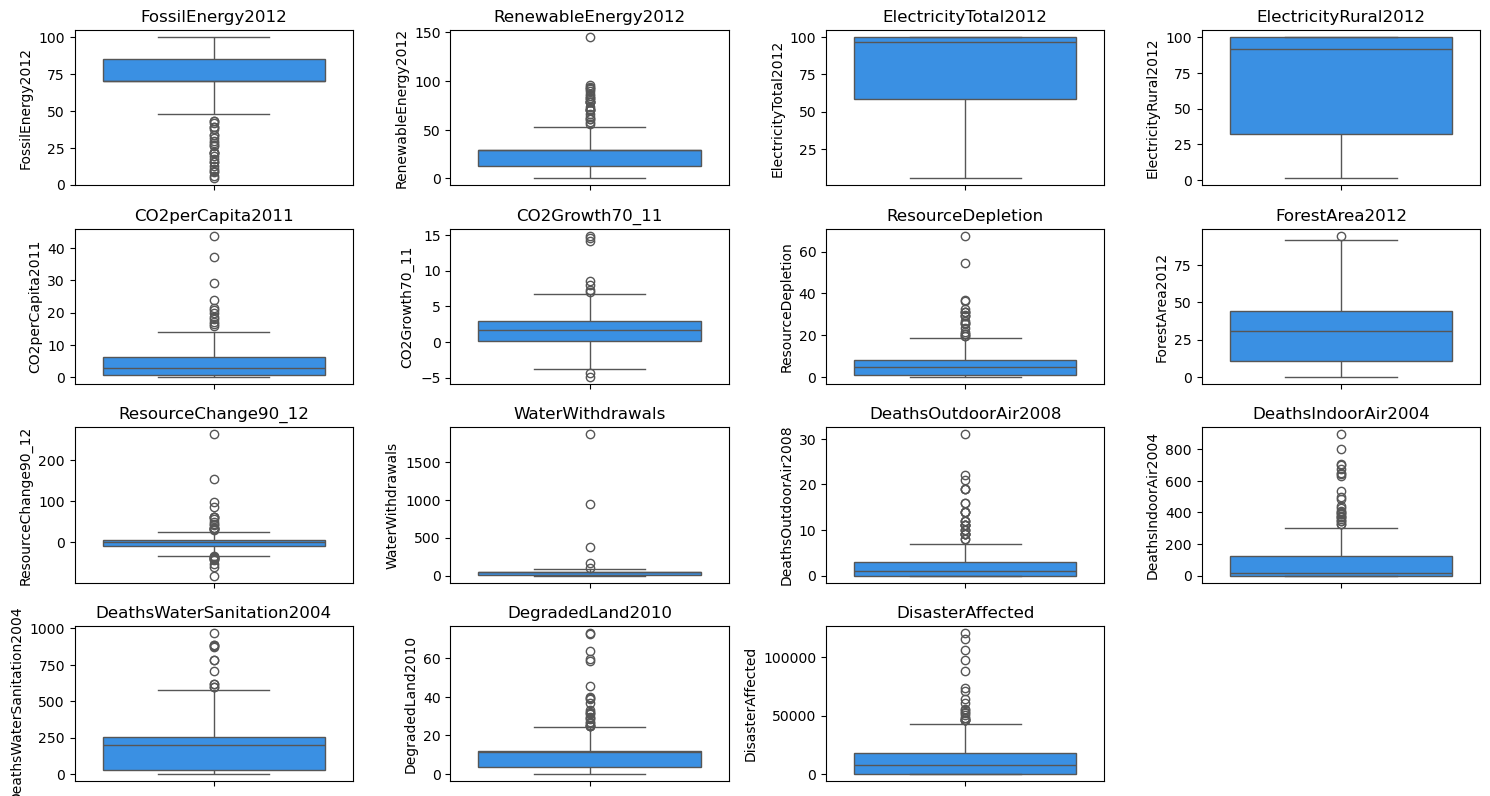

In [38]:
# BoxPlot for outlier detection
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col], color='dodgerblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [39]:
df1 = df.copy()

In [40]:
df1.head()

,Location,FossilEnergy2012,RenewableEnergy2012,ElectricityTotal2012,ElectricityRural2012,CO2perCapita2011,CO2Growth70_11,ResourceDepletion,ForestArea2012,ResourceChange90_12,WaterWithdrawals,DeathsOutdoorAir2008,DeathsIndoorAir2004,DeathsWaterSanitation2004,DegradedLand2010,DisasterAffected
0,Afghanistan,70.076923,29.298621,43.0,32.0,0.4,3.300000,1.200000,2.1,0.0,44.190351,21.0,100.19,196.430233,11.000000,17311.000000
1,Albania,60.500000,26.600000,100.0,100.0,1.6,-0.300000,3.500000,28.2,-1.9,4.300000,0.0,5.00,50.000000,5.700000,20568.000000
2,Algeria,99.900000,0.100000,100.0,100.0,3.2,3.800000,18.000000,0.6,-11.6,44.190351,1.0,5.00,101.000000,28.800000,343.000000
3,Andorra,70.076923,29.298621,100.0,100.0,6.3,1.675449,7.435135,34.0,0.0,44.190351,0.0,0.00,0.000000,12.187421,14766.634409
4,Angola,39.300000,60.700000,37.0,6.0,1.5,2.900000,31.000000,46.7,-4.5,0.500000,11.0,100.19,196.430233,3.300000,13473.000000


### Handling Outliers

In [42]:
# Cap outliers to the threshold values (IQR method)
df1[num_cols] = df1[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

print("Shape after capping outliers:", df1[num_cols].shape)

Shape after capping outliers: (212, 15)


##### Boxplot after outlier removal

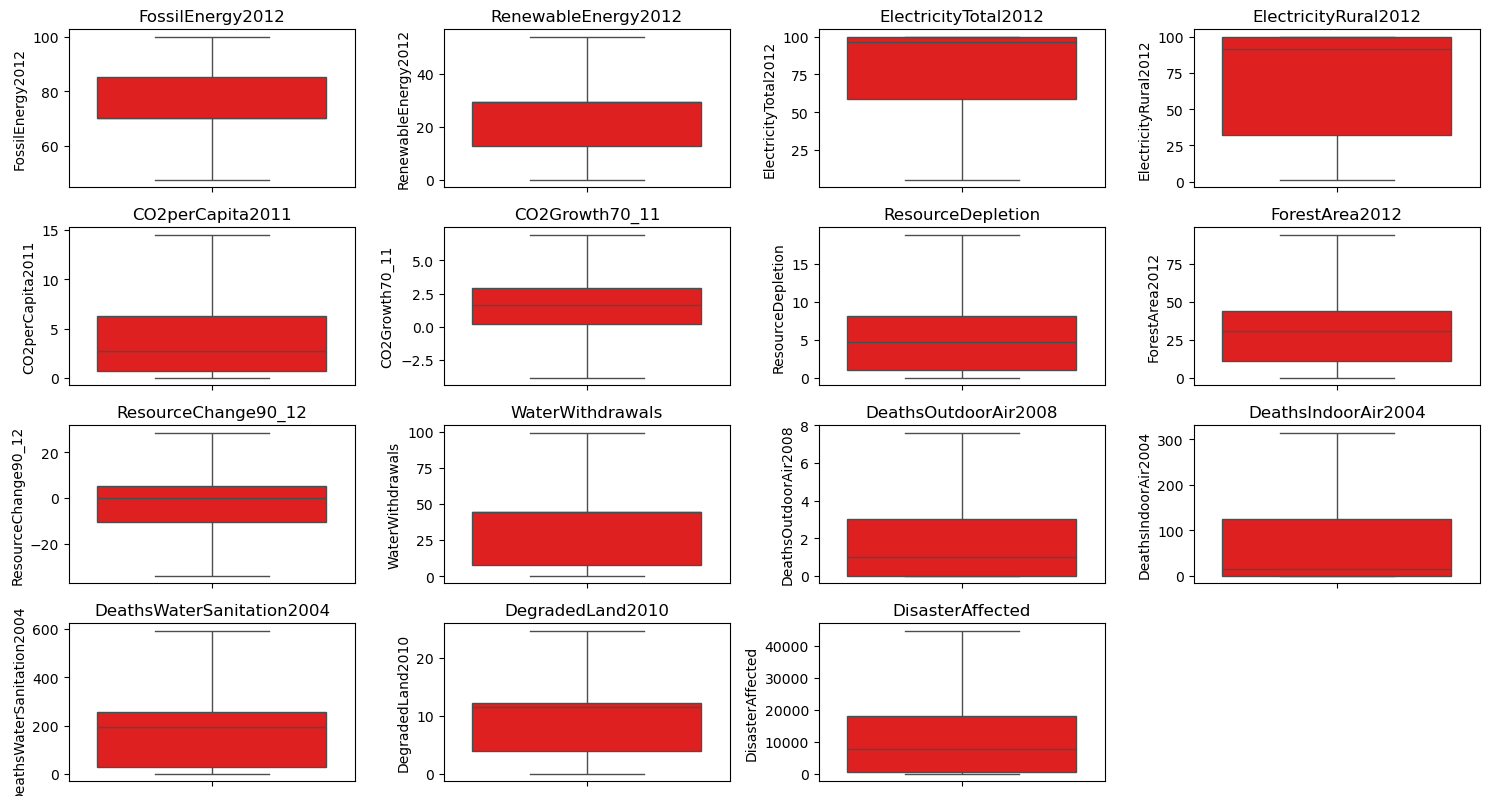

In [44]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df1[col], color='red')
    plt.title(col)
plt.tight_layout()
plt.show()

#### Skewness

In [46]:
skewness = df[num_cols].skew()

# Categorize skewness
no_skewness = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderate_skewness = skewness[(skewness > 0.5) & (skewness <= 1) | (skewness < -0.5) & (skewness >= -1)]
high_skewness = skewness[(skewness > 1) | (skewness < -1)]

# Display results
print("Skewness of Numeric Columns:\n", skewness)
print("\nNo Skewness:\n", no_skewness)
print("\nModerate Skewness:\n", moderate_skewness)
print("\nHigh Skewness:\n", high_skewness)

Skewness of Numeric Columns:
 FossilEnergy2012             -1.105970
RenewableEnergy2012           1.479246
ElectricityTotal2012         -1.059977
ElectricityRural2012         -0.724415
CO2perCapita2011              3.133635
CO2Growth70_11                1.425425
ResourceDepletion             2.705324
ForestArea2012                0.572769
ResourceChange90_12           4.119555
WaterWithdrawals             10.840730
DeathsOutdoorAir2008          2.475133
DeathsIndoorAir2004           2.319569
DeathsWaterSanitation2004     1.475074
DegradedLand2010              2.443647
DisasterAffected              2.499224
dtype: float64

No Skewness:
 Series([], dtype: float64)

Moderate Skewness:
 ElectricityRural2012   -0.724415
ForestArea2012          0.572769
dtype: float64

High Skewness:
 FossilEnergy2012             -1.105970
RenewableEnergy2012           1.479246
ElectricityTotal2012         -1.059977
CO2perCapita2011              3.133635
CO2Growth70_11                1.425425
ResourceDeplet

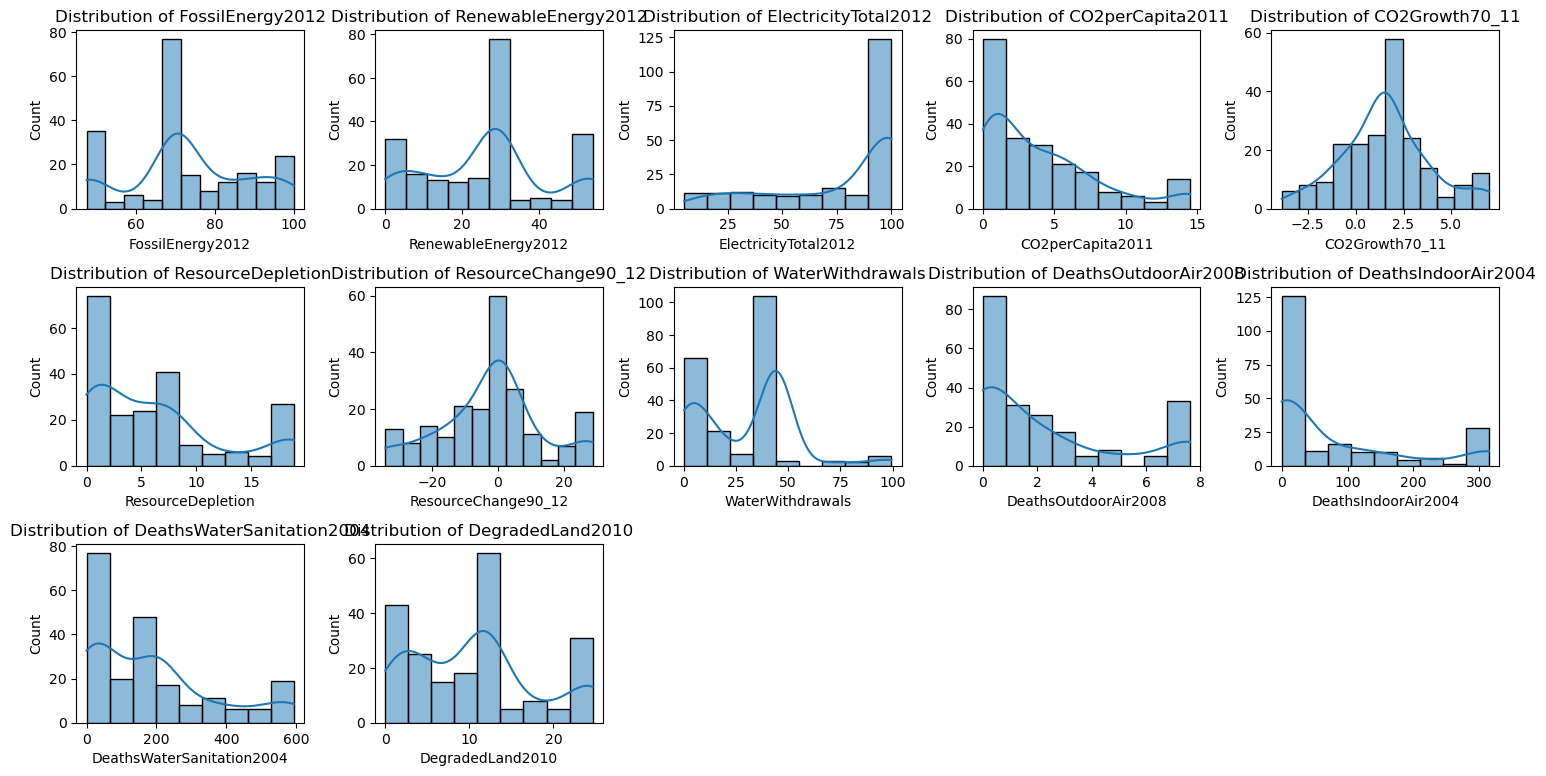

In [47]:
#Before Transformation
plt.figure(figsize=(15, 10))

# Loop through the desired columns
for i, col in enumerate(['FossilEnergy2012','RenewableEnergy2012','ElectricityTotal2012','CO2perCapita2011','CO2Growth70_11','ResourceDepletion','ResourceChange90_12','WaterWithdrawals','DeathsOutdoorAir2008','DeathsIndoorAir2004','DeathsWaterSanitation2004','DegradedLand2010'], 1):
    plt.subplot(4, 5, i)
    sns.histplot(df1[col], kde=True) 
    plt.title(f'Distribution of {col}') 

plt.tight_layout()  # Adjust spacing between plots
plt.show()

In [48]:
skew_vals = df1[['FossilEnergy2012','RenewableEnergy2012','ElectricityTotal2012',
                 'CO2perCapita2011','CO2Growth70_11','ResourceDepletion','ResourceChange90_12',
                 'WaterWithdrawals','DeathsOutdoorAir2008','DeathsIndoorAir2004',
                 'DeathsWaterSanitation2004','DegradedLand2010']].skew()

skewed_cols = skew_vals[abs(skew_vals) > 1].index.tolist()
print("Highly skewed features:\n", skew_vals[abs(skew_vals) > 1])


Highly skewed features:
 ElectricityTotal2012   -1.059977
CO2perCapita2011        1.175093
DeathsOutdoorAir2008    1.038921
DeathsIndoorAir2004     1.264134
dtype: float64


In [49]:
for col in skewed_cols:
    if (df1[col] >= 0).all():
        df1[col] = np.sqrt(df1[col])


In [50]:
skewness_after = df1[skewed_cols].skew()
print("Skewness after sqrt transformation:\n", skewness_after)


Skewness after sqrt transformation:
 ElectricityTotal2012   -1.358553
CO2perCapita2011        0.340330
DeathsOutdoorAir2008    0.346933
DeathsIndoorAir2004     0.666066
dtype: float64


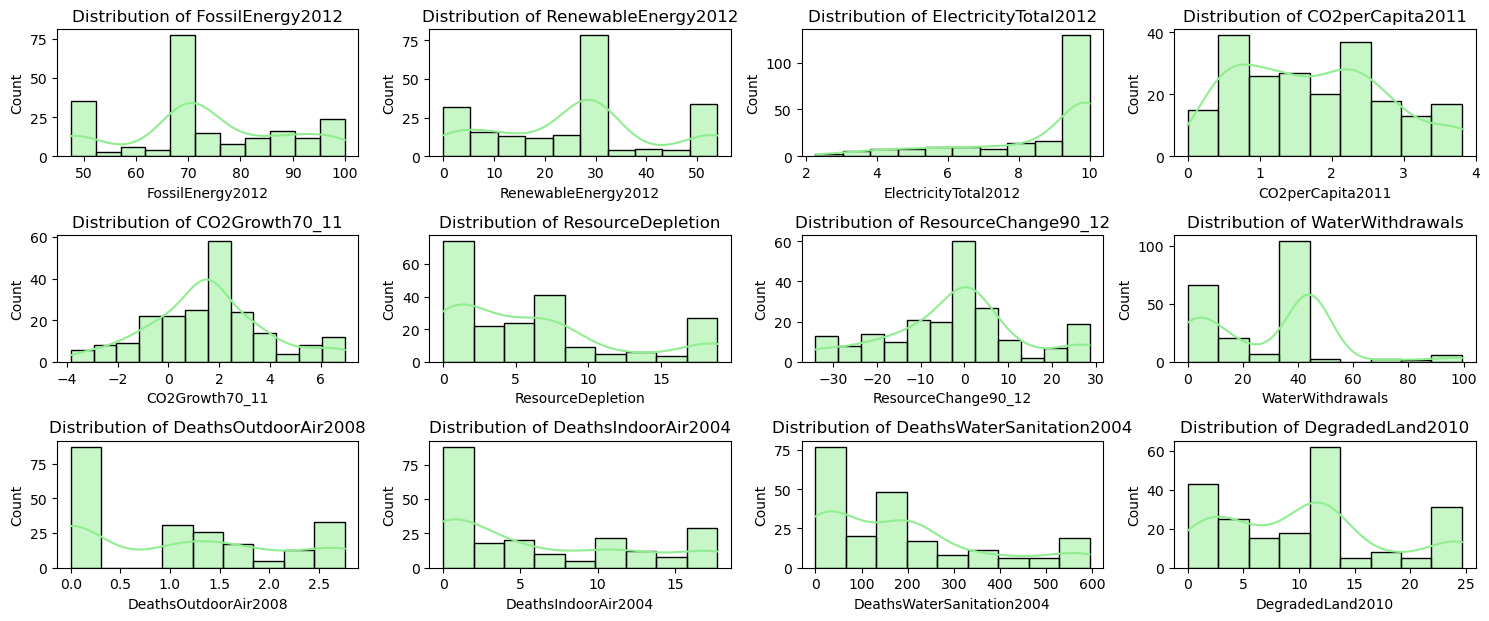

In [51]:
#After Transformation
plt.figure(figsize=(15, 10))

# Loop through the desired columns
for i, col in enumerate(['FossilEnergy2012','RenewableEnergy2012','ElectricityTotal2012',
                 'CO2perCapita2011','CO2Growth70_11','ResourceDepletion','ResourceChange90_12',
                 'WaterWithdrawals','DeathsOutdoorAir2008','DeathsIndoorAir2004',
                 'DeathsWaterSanitation2004','DegradedLand2010'], 1):
    plt.subplot(5, 4, i)
    sns.histplot(df1[col], kde=True,color='lightgreen') 
    plt.title(f'Distribution of {col}') 

plt.tight_layout()  # Adjust spacing between plots
plt.show()

### Correlation

In [53]:
#Heatmap for Correlation
corr1 = df1[num_cols].corr()

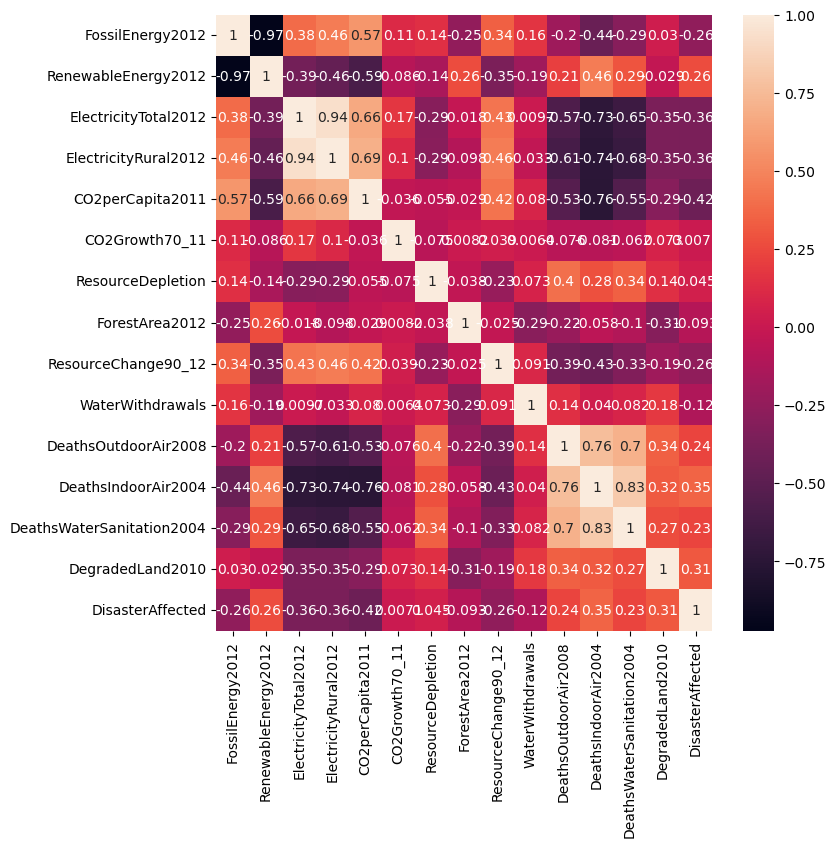

In [54]:
plt.figure(figsize=(8,8))
sns.heatmap(corr1, annot=True)
plt.savefig("corre.png")
plt.show()

#### Visualisations

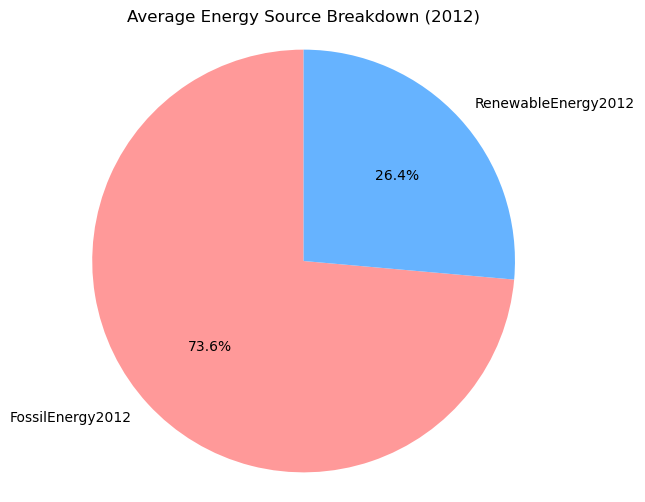

In [56]:
# Calculate average share of energy sources
energy_avg = df1[['FossilEnergy2012', 'RenewableEnergy2012']].mean()

# Plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(energy_avg, labels=energy_avg.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Average Energy Source Breakdown (2012)')
plt.axis('equal')
plt.show()


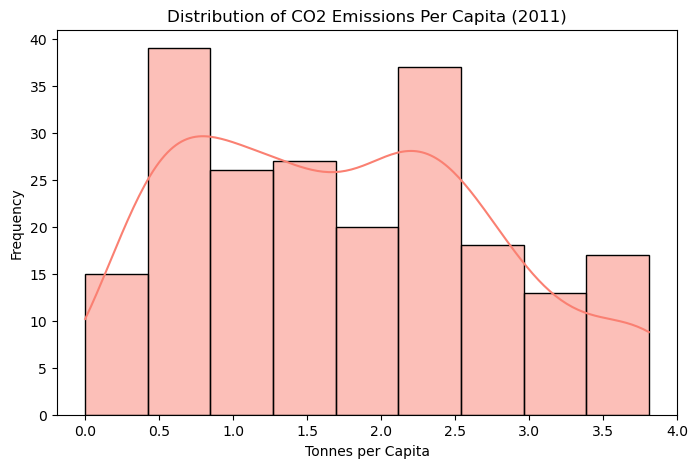

In [57]:
# Histogram of Co2 emission
plt.figure(figsize=(8, 5))
sns.histplot(df1['CO2perCapita2011'], kde=True, color='salmon')
plt.title('Distribution of CO2 Emissions Per Capita (2011)')
plt.xlabel('Tonnes per Capita')
plt.ylabel('Frequency')
plt.show()


In [58]:
df1.columns

Index(['Location', 'FossilEnergy2012', 'RenewableEnergy2012',
       'ElectricityTotal2012', 'ElectricityRural2012', 'CO2perCapita2011',
       'CO2Growth70_11', 'ResourceDepletion', 'ForestArea2012',
       'ResourceChange90_12', 'WaterWithdrawals', 'DeathsOutdoorAir2008',
       'DeathsIndoorAir2004', 'DeathsWaterSanitation2004', 'DegradedLand2010',
       'DisasterAffected'],
      dtype='object')

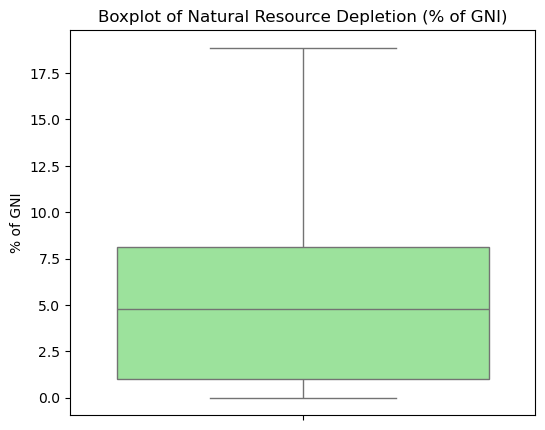

In [59]:
#Box plot for resourse depletion
plt.figure(figsize=(6, 5))
sns.boxplot(y=df1['ResourceDepletion'], color='lightgreen')
plt.title('Boxplot of Natural Resource Depletion (% of GNI)')
plt.ylabel('% of GNI')
plt.show()


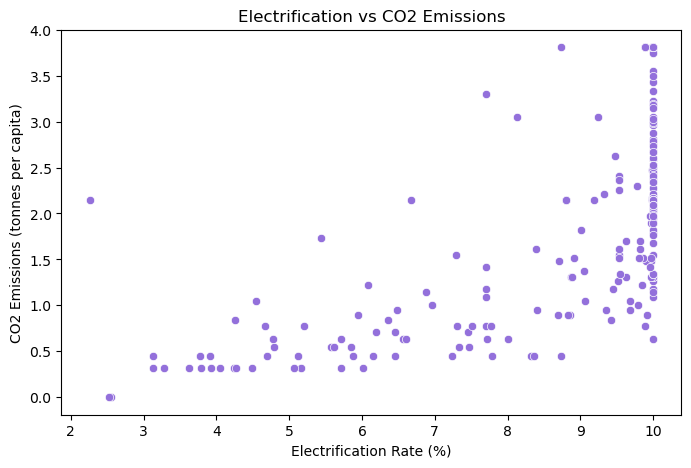

In [60]:
## Relation between electrification and co2 emission
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ElectricityTotal2012', y='CO2perCapita2011', data=df1, color='mediumpurple')
plt.title('Electrification vs CO2 Emissions')
plt.xlabel('Electrification Rate (%)')
plt.ylabel('CO2 Emissions (tonnes per capita)')
plt.show()


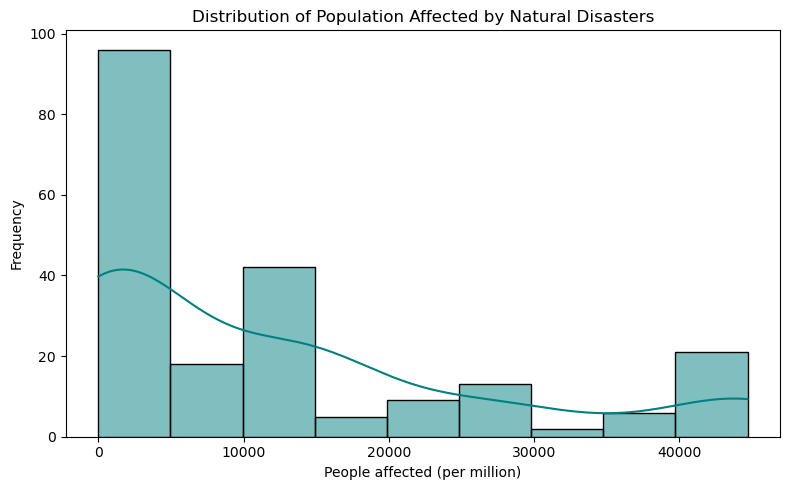

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df1['DisasterAffected'], kde=True, color='teal')
plt.title('Distribution of Population Affected by Natural Disasters')
plt.xlabel('People affected (per million)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### "Top 10 CO₂ Emitting Countries (2011)"


In [63]:
df.sort_values('CO2perCapita2011', ascending=False).head(10).style.bar(
    subset='CO2perCapita2011', color='lightcoral'
).set_caption("Top 10 CO₂ Emitting Countries (2011)")

,Location,FossilEnergy2012,RenewableEnergy2012,ElectricityTotal2012,ElectricityRural2012,CO2perCapita2011,CO2Growth70_11,ResourceDepletion,ForestArea2012,ResourceChange90_12,WaterWithdrawals,DeathsOutdoorAir2008,DeathsIndoorAir2004,DeathsWaterSanitation2004,DegradedLand2010,DisasterAffected
151,Qatar,100.000000,0.000000,97.700000,92.900000,43.900000,-1.500000,17.400000,0.000000,0.778894,374.100000,1.000000,0.000000,6.000000,0.100000,14766.634409
192,Trinidad and Tobago,99.900000,0.100000,99.800000,99.000000,37.200000,4.500000,29.300000,43.900000,-6.500000,8.800000,0.000000,1.000000,5.000000,12.187421,0.000000
97,Kuwait,100.000000,0.000000,97.700000,92.900000,29.100000,-0.400000,25.100000,0.400000,86.600000,44.190351,1.000000,0.000000,196.430233,0.600000,0.000000
25,Brunei Darussalam,100.000000,0.000000,76.200000,67.100000,24.000000,-3.100000,29.800000,71.400000,-8.900000,44.190351,0.000000,0.000000,196.430233,12.187421,0.000000
139,Oman,100.000000,0.000000,97.700000,92.900000,21.400000,14.500000,25.700000,0.000000,0.000000,44.190351,1.000000,0.000000,196.430233,5.800000,682.000000
110,Luxembourg,87.400000,4.000000,100.000000,100.000000,20.900000,-2.100000,0.000000,33.500000,0.778894,44.190351,0.000000,0.000000,2.000000,12.187421,0.000000
199,United Arab Emirates,70.076923,0.100000,97.700000,92.900000,20.000000,-3.800000,11.700000,3.800000,30.400000,1867.000000,1.000000,0.000000,10.000000,1.900000,14766.634409
162,Saudi Arabia,100.000000,0.000000,97.700000,92.900000,18.700000,2.900000,20.600000,0.500000,0.000000,943.300000,2.000000,0.000000,196.430233,4.300000,41.000000
13,Bahrain,99.900000,0.000000,97.700000,92.900000,18.100000,1.300000,9.700000,0.700000,154.200000,44.190351,0.000000,0.000000,196.430233,12.187421,14766.634409
201,United States,83.600000,16.300000,100.000000,100.000000,17.000000,-0.700000,1.000000,33.300000,3.000000,15.500000,0.000000,0.000000,0.000000,1.100000,5074.000000


##### CO₂ Emissions vs Resource Depletion

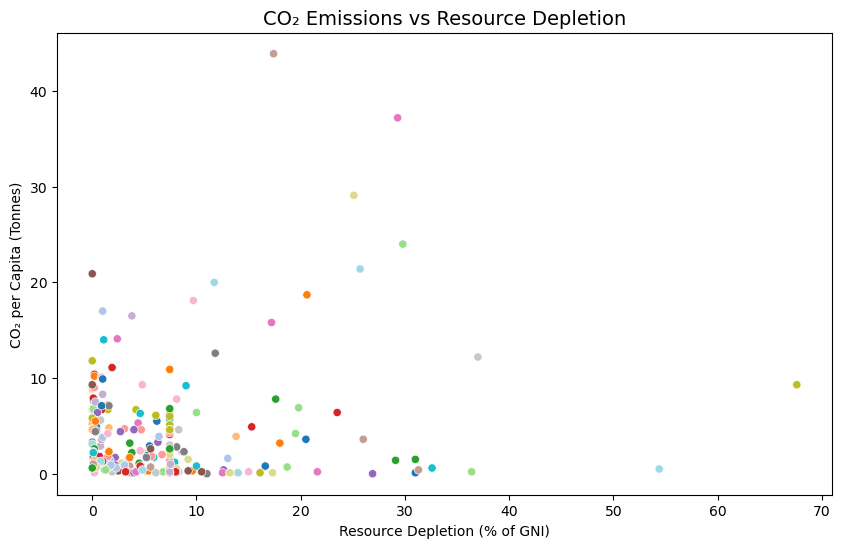

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ResourceDepletion', y='CO2perCapita2011', hue='Location', legend=False, palette='tab20')
plt.title('CO₂ Emissions vs Resource Depletion', fontsize=14)
plt.xlabel('Resource Depletion (% of GNI)')
plt.ylabel('CO₂ per Capita (Tonnes)')
plt.show()


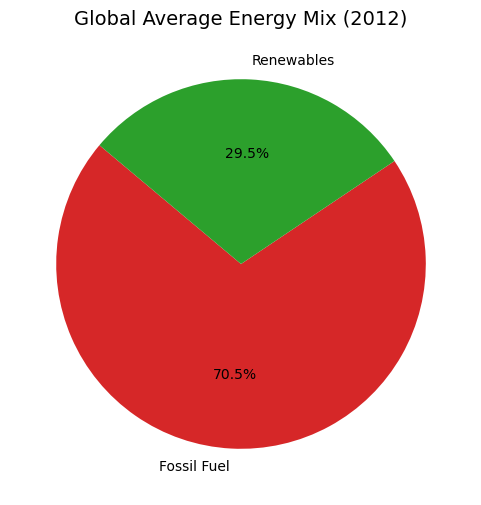

In [66]:
avg_fossil = df['FossilEnergy2012'].mean()
avg_renewable = df['RenewableEnergy2012'].mean()

plt.figure(figsize=(6,6))
plt.pie(
    [avg_fossil, avg_renewable],
    labels=['Fossil Fuel', 'Renewables'],
    autopct='%1.1f%%',
    colors=['#d62728','#2ca02c'],
    startangle=140
)
plt.title('Global Average Energy Mix (2012)', fontsize=14)
plt.show()

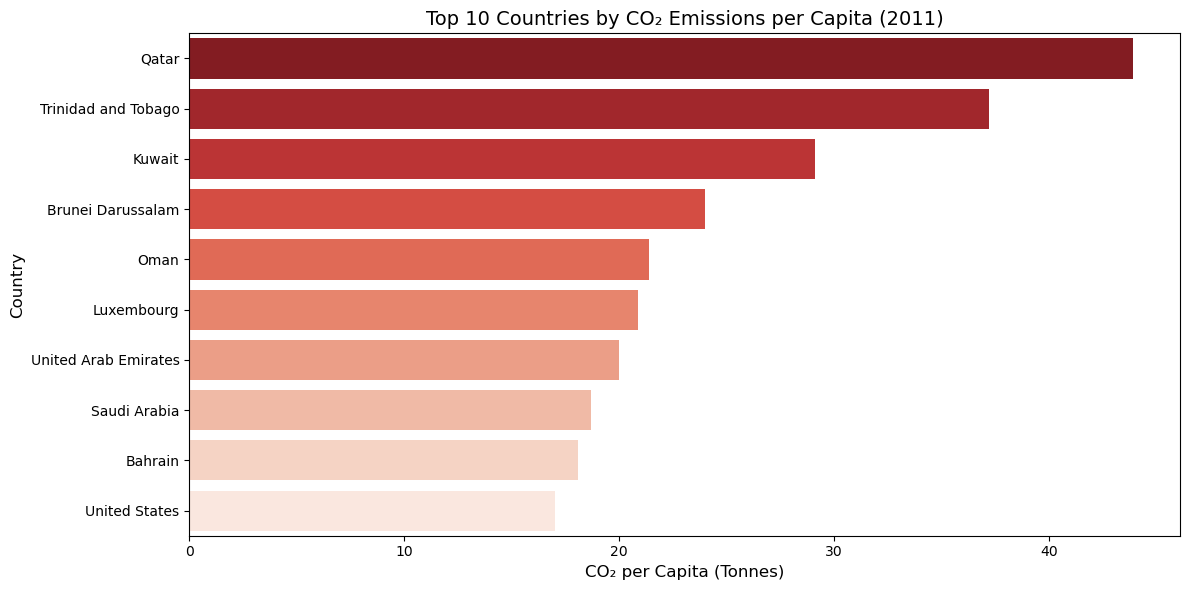

In [67]:
top10 = df.sort_values('CO2perCapita2011', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='CO2perCapita2011', y='Location', palette='Reds_r')
plt.title('Top 10 Countries by CO₂ Emissions per Capita (2011)', fontsize=14)
plt.xlabel('CO₂ per Capita (Tonnes)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

In [68]:
df1

,Location,FossilEnergy2012,RenewableEnergy2012,ElectricityTotal2012,ElectricityRural2012,CO2perCapita2011,CO2Growth70_11,ResourceDepletion,ForestArea2012,ResourceChange90_12,WaterWithdrawals,DeathsOutdoorAir2008,DeathsIndoorAir2004,DeathsWaterSanitation2004,DegradedLand2010,DisasterAffected
0,Afghanistan,70.076923,29.298621,6.557439,32.0,0.632456,3.300000,1.200000,2.1,0.0,44.190351,2.761006,10.009495,196.430233,11.000000,17311.000000
1,Albania,60.500000,26.600000,10.000000,100.0,1.264911,-0.300000,3.500000,28.2,-1.9,4.300000,0.000000,2.236068,50.000000,5.700000,20568.000000
2,Algeria,99.900000,0.100000,10.000000,100.0,1.788854,3.800000,18.000000,0.6,-11.6,44.190351,1.000000,2.236068,101.000000,24.656053,343.000000
3,Andorra,70.076923,29.298621,10.000000,100.0,2.509980,1.675449,7.435135,34.0,0.0,44.190351,0.000000,0.000000,0.000000,12.187421,14766.634409
4,Angola,47.467308,53.934052,6.082763,6.0,1.224745,2.900000,18.875000,46.7,-4.5,0.500000,2.761006,10.009495,196.430233,3.300000,13473.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Viet Nam,71.000000,28.200000,9.949874,97.7,1.414214,3.600000,6.700000,45.4,28.6,9.300000,1.000000,5.196152,65.000000,8.000000,20060.000000
208,World,81.200000,18.600000,9.192388,70.9,2.144761,-0.900000,4.000000,30.9,-3.7,44.190351,2.236068,12.000000,263.000000,10.200000,14766.634409
209,Yemen,98.500000,1.500000,6.957011,33.5,1.000000,2.800000,7.500000,1.0,0.0,99.375877,2.236068,13.190906,377.000000,24.656053,360.000000
210,Zambia,47.467308,53.934052,4.701064,5.8,0.447214,-3.850000,10.500000,66.1,-6.9,44.190351,2.761006,17.730623,503.000000,4.600000,26183.000000


### Feature Engineering: Encoding Categorical Variables

In [70]:
#Encoding non_numeric column
# One-Hot Encoding
df1 = pd.get_dummies(df1, columns=['Location'])


In [71]:
df1

,FossilEnergy2012,RenewableEnergy2012,ElectricityTotal2012,ElectricityRural2012,CO2perCapita2011,CO2Growth70_11,ResourceDepletion,ForestArea2012,ResourceChange90_12,WaterWithdrawals,...,Location_Uruguay,Location_Uzbekistan,Location_Vanuatu,Location_Venezuela (Bolivarian Republic of),Location_Very high human development,Location_Viet Nam,Location_World,Location_Yemen,Location_Zambia,Location_Zimbabwe
0,70.076923,29.298621,6.557439,32.0,0.632456,3.300000,1.200000,2.1,0.0,44.190351,...,False,False,False,False,False,False,False,False,False,False
1,60.500000,26.600000,10.000000,100.0,1.264911,-0.300000,3.500000,28.2,-1.9,4.300000,...,False,False,False,False,False,False,False,False,False,False
2,99.900000,0.100000,10.000000,100.0,1.788854,3.800000,18.000000,0.6,-11.6,44.190351,...,False,False,False,False,False,False,False,False,False,False
3,70.076923,29.298621,10.000000,100.0,2.509980,1.675449,7.435135,34.0,0.0,44.190351,...,False,False,False,False,False,False,False,False,False,False
4,47.467308,53.934052,6.082763,6.0,1.224745,2.900000,18.875000,46.7,-4.5,0.500000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,71.000000,28.200000,9.949874,97.7,1.414214,3.600000,6.700000,45.4,28.6,9.300000,...,False,False,False,False,False,True,False,False,False,False
208,81.200000,18.600000,9.192388,70.9,2.144761,-0.900000,4.000000,30.9,-3.7,44.190351,...,False,False,False,False,False,False,True,False,False,False
209,98.500000,1.500000,6.957011,33.5,1.000000,2.800000,7.500000,1.0,0.0,99.375877,...,False,False,False,False,False,False,False,True,False,False
210,47.467308,53.934052,4.701064,5.8,0.447214,-3.850000,10.500000,66.1,-6.9,44.190351,...,False,False,False,False,False,False,False,False,True,False


In [72]:
#Converting boolean into int 
boolean_cols = df1.select_dtypes(include='bool').columns

df1[boolean_cols] = df1[boolean_cols].astype(int)


In [73]:
df1

,FossilEnergy2012,RenewableEnergy2012,ElectricityTotal2012,ElectricityRural2012,CO2perCapita2011,CO2Growth70_11,ResourceDepletion,ForestArea2012,ResourceChange90_12,WaterWithdrawals,...,Location_Uruguay,Location_Uzbekistan,Location_Vanuatu,Location_Venezuela (Bolivarian Republic of),Location_Very high human development,Location_Viet Nam,Location_World,Location_Yemen,Location_Zambia,Location_Zimbabwe
0,70.076923,29.298621,6.557439,32.0,0.632456,3.300000,1.200000,2.1,0.0,44.190351,...,0,0,0,0,0,0,0,0,0,0
1,60.500000,26.600000,10.000000,100.0,1.264911,-0.300000,3.500000,28.2,-1.9,4.300000,...,0,0,0,0,0,0,0,0,0,0
2,99.900000,0.100000,10.000000,100.0,1.788854,3.800000,18.000000,0.6,-11.6,44.190351,...,0,0,0,0,0,0,0,0,0,0
3,70.076923,29.298621,10.000000,100.0,2.509980,1.675449,7.435135,34.0,0.0,44.190351,...,0,0,0,0,0,0,0,0,0,0
4,47.467308,53.934052,6.082763,6.0,1.224745,2.900000,18.875000,46.7,-4.5,0.500000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,71.000000,28.200000,9.949874,97.7,1.414214,3.600000,6.700000,45.4,28.6,9.300000,...,0,0,0,0,0,1,0,0,0,0
208,81.200000,18.600000,9.192388,70.9,2.144761,-0.900000,4.000000,30.9,-3.7,44.190351,...,0,0,0,0,0,0,1,0,0,0
209,98.500000,1.500000,6.957011,33.5,1.000000,2.800000,7.500000,1.0,0.0,99.375877,...,0,0,0,0,0,0,0,1,0,0
210,47.467308,53.934052,4.701064,5.8,0.447214,-3.850000,10.500000,66.1,-6.9,44.190351,...,0,0,0,0,0,0,0,0,1,0


#### Splitting the dataset and setting the target variable

In [75]:
y = df1.CO2perCapita2011

In [76]:
x=df1.drop('CO2perCapita2011',axis=1)
x

,FossilEnergy2012,RenewableEnergy2012,ElectricityTotal2012,ElectricityRural2012,CO2Growth70_11,ResourceDepletion,ForestArea2012,ResourceChange90_12,WaterWithdrawals,DeathsOutdoorAir2008,...,Location_Uruguay,Location_Uzbekistan,Location_Vanuatu,Location_Venezuela (Bolivarian Republic of),Location_Very high human development,Location_Viet Nam,Location_World,Location_Yemen,Location_Zambia,Location_Zimbabwe
0,70.076923,29.298621,6.557439,32.0,3.300000,1.200000,2.1,0.0,44.190351,2.761006,...,0,0,0,0,0,0,0,0,0,0
1,60.500000,26.600000,10.000000,100.0,-0.300000,3.500000,28.2,-1.9,4.300000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,99.900000,0.100000,10.000000,100.0,3.800000,18.000000,0.6,-11.6,44.190351,1.000000,...,0,0,0,0,0,0,0,0,0,0
3,70.076923,29.298621,10.000000,100.0,1.675449,7.435135,34.0,0.0,44.190351,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,47.467308,53.934052,6.082763,6.0,2.900000,18.875000,46.7,-4.5,0.500000,2.761006,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,71.000000,28.200000,9.949874,97.7,3.600000,6.700000,45.4,28.6,9.300000,1.000000,...,0,0,0,0,0,1,0,0,0,0
208,81.200000,18.600000,9.192388,70.9,-0.900000,4.000000,30.9,-3.7,44.190351,2.236068,...,0,0,0,0,0,0,1,0,0,0
209,98.500000,1.500000,6.957011,33.5,2.800000,7.500000,1.0,0.0,99.375877,2.236068,...,0,0,0,0,0,0,0,1,0,0
210,47.467308,53.934052,4.701064,5.8,-3.850000,10.500000,66.1,-6.9,44.190351,2.761006,...,0,0,0,0,0,0,0,0,1,0


## Feature Selection: Filter Methods

In [78]:
from sklearn.feature_selection import SelectKBest, f_regression

#Initialize SelectKBest with a scoring function and number of features to select
k_best = SelectKBest(score_func=f_regression, k=14)

#Fit and transform the feature set (X) with respect to the target variable (y)
X_k_best = k_best.fit_transform(x, y)

#Get the scores for each feature
feature_scores = k_best.scores_

#Retrieve the names of the selected features
selected_features = x.columns[k_best.get_support()].tolist()

#selected_features = x.columns

# Output the results
print("SelectKBest Results:")
print(f"Features selected: {len(selected_features)}")
print("Selected features:", selected_features)
print("\nFeature Scores:")
#print(pd.DataFrame({'Feature': x.columns, 'Score': feature_scores}).sort_values(by='Score', ascending=False).head(12))

scores = pd.DataFrame({'Feature': x.columns, 'Score': feature_scores})

scores_sorted = scores.sort_values(by='Score', ascending=False).head(24)

print(scores_sorted)

#Convert X_k_best to a DataFrame for scaling
X_k_best_df = pd.DataFrame(X_k_best, columns=selected_features)


SelectKBest Results:
Features selected: 14
Selected features: ['FossilEnergy2012', 'RenewableEnergy2012', 'ElectricityTotal2012', 'ElectricityRural2012', 'ResourceChange90_12', 'DeathsOutdoorAir2008', 'DeathsIndoorAir2004', 'DeathsWaterSanitation2004', 'DegradedLand2010', 'DisasterAffected', 'Location_Saudi Arabia', 'Location_Trinidad and Tobago', 'Location_United Arab Emirates', 'Location_United States']

Feature Scores:
                           Feature       Score
10             DeathsIndoorAir2004  279.358431
3             ElectricityRural2012  194.720205
2             ElectricityTotal2012  164.280429
1              RenewableEnergy2012  113.506268
0                 FossilEnergy2012  102.311454
11       DeathsWaterSanitation2004   90.131253
9             DeathsOutdoorAir2008   82.138525
13                DisasterAffected   45.574786
7              ResourceChange90_12   44.635440
12                DegradedLand2010   19.959914
27                Location_Bahrain    4.153276
39      Lo

In [79]:
X_k_best_df.head()

,FossilEnergy2012,RenewableEnergy2012,ElectricityTotal2012,ElectricityRural2012,ResourceChange90_12,DeathsOutdoorAir2008,DeathsIndoorAir2004,DeathsWaterSanitation2004,DegradedLand2010,DisasterAffected,Location_Saudi Arabia,Location_Trinidad and Tobago,Location_United Arab Emirates,Location_United States
0,70.076923,29.298621,6.557439,32.0,0.0,2.761006,10.009495,196.430233,11.000000,17311.000000,0.0,0.0,0.0,0.0
1,60.500000,26.600000,10.000000,100.0,-1.9,0.000000,2.236068,50.000000,5.700000,20568.000000,0.0,0.0,0.0,0.0
2,99.900000,0.100000,10.000000,100.0,-11.6,1.000000,2.236068,101.000000,24.656053,343.000000,0.0,0.0,0.0,0.0
3,70.076923,29.298621,10.000000,100.0,0.0,0.000000,0.000000,0.000000,12.187421,14766.634409,0.0,0.0,0.0,0.0
4,47.467308,53.934052,6.082763,6.0,-4.5,2.761006,10.009495,196.430233,3.300000,13473.000000,0.0,0.0,0.0,0.0


### Split Data into Training and Testing Sets

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_k_best_df, y, test_size = 0.2, random_state=42)

In [82]:
# Output the shapes of the new training and testing sets 
print("Training set shape (features):", X_train.shape) 
print("Test set shape (features):", X_test.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (169, 14)
Test set shape (features): (43, 14)
Training set shape (target): (169,)
Test set shape (target): (43,)


### Feature Scaling

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Display shapes to confirm
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (169, 14)
X_test_scaled shape: (43, 14)


## Model Building

In [86]:
models={
    'Linear Regression':LinearRegression(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(), 
    'Gradiant Boosting Regressor':GradientBoostingRegressor(), 
    'Support Vector Regressor':SVR()
}

**Model Evaluation**

In [88]:
results = {} # Used to store evaluation results

for model_name, model in models.items():
    # fit the model
    model.fit(X_train_scaled, y_train)
    
    # make the prediction
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # Store the results
    results[model_name] = {"MAE":mae, "MSE":mse, "RMSE":rmse, "R2":r2}

results_df = pd.DataFrame(results).T
print(results_df)

                                  MAE       MSE      RMSE        R2
Linear Regression            0.471896  0.351598  0.592957  0.675549
Decision Tree Regressor      0.497648  0.448433  0.669651  0.586191
Random Forest Regressor      0.409774  0.323104  0.568422  0.701844
Gradiant Boosting Regressor  0.398075  0.341346  0.584248  0.685010
Support Vector Regressor     0.459623  0.360127  0.600106  0.667679


In [89]:
# Finding the best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest Regressor


<Axes: xlabel='CO2perCapita2011', ylabel='Count'>

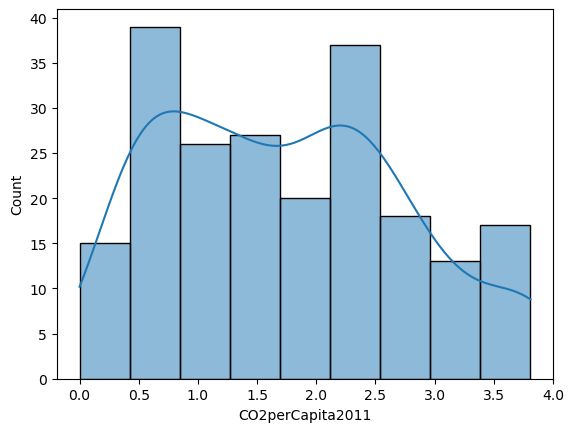

In [90]:
sns.histplot(y, kde=True)

In [91]:
df

,Location,FossilEnergy2012,RenewableEnergy2012,ElectricityTotal2012,ElectricityRural2012,CO2perCapita2011,CO2Growth70_11,ResourceDepletion,ForestArea2012,ResourceChange90_12,WaterWithdrawals,DeathsOutdoorAir2008,DeathsIndoorAir2004,DeathsWaterSanitation2004,DegradedLand2010,DisasterAffected
0,Afghanistan,70.076923,29.298621,43.0,32.0,0.4,3.300000,1.200000,2.1,0.0,44.190351,21.0,100.19,196.430233,11.000000,17311.000000
1,Albania,60.500000,26.600000,100.0,100.0,1.6,-0.300000,3.500000,28.2,-1.9,4.300000,0.0,5.00,50.000000,5.700000,20568.000000
2,Algeria,99.900000,0.100000,100.0,100.0,3.2,3.800000,18.000000,0.6,-11.6,44.190351,1.0,5.00,101.000000,28.800000,343.000000
3,Andorra,70.076923,29.298621,100.0,100.0,6.3,1.675449,7.435135,34.0,0.0,44.190351,0.0,0.00,0.000000,12.187421,14766.634409
4,Angola,39.300000,60.700000,37.0,6.0,1.5,2.900000,31.000000,46.7,-4.5,0.500000,11.0,100.19,196.430233,3.300000,13473.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Viet Nam,71.000000,28.200000,99.0,97.7,2.0,3.600000,6.700000,45.4,57.9,9.300000,1.0,27.00,65.000000,8.000000,20060.000000
208,World,81.200000,18.600000,84.5,70.9,4.6,-0.900000,4.000000,30.9,-3.7,44.190351,5.0,144.00,263.000000,10.200000,14766.634409
209,Yemen,98.500000,1.500000,48.4,33.5,1.0,2.800000,7.500000,1.0,0.0,168.600000,5.0,174.00,377.000000,32.400000,360.000000
210,Zambia,8.800000,91.800000,22.1,5.8,0.2,-4.400000,10.500000,66.1,-6.9,44.190351,12.0,378.00,503.000000,4.600000,26183.000000


### HyperParameter Tuning

In [93]:
# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],     
    'max_depth': [10, 20],          
    'min_samples_split': [2, 5],     
    'min_samples_leaf': [1, 2],      
    'bootstrap': [True, False]       
}

In [94]:
# Initialize model and GridSearchCV

rf_model = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring='r2',      #prefered r2 scoring
    cv=5,
    n_jobs=-1,
    verbose=2
)



In [95]:
# Fit the Grid Search to the data
grid_search_rf.fit(X_train_scaled, y_train)

# Get best parameters and score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_  # This is R², so no negation needed

print(f"Best Parameters: {best_params_rf}")
print(f"Best R² Score (Cross-Validated): {best_score_rf:.4f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best R² Score (Cross-Validated): 0.7089


### Evaluation after tuning

In [97]:
# Initialize the Random Forest Regressor with tuned parameters
final_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    bootstrap=best_params_rf['bootstrap'],
    random_state=42
)

# Fit the model to the training data
final_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_tuned = final_model.predict(X_test_scaled)

# Calculate performance metrics
final_metrics = {
    'MAE': mean_absolute_error(y_test, y_pred_tuned),
    'MSE': mean_squared_error(y_test, y_pred_tuned),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_tuned)),
    'R2': r2_score(y_test, y_pred_tuned)
}

# Print final metrics
print("\nModel Performance After Tuning:")
for metric_name, value in final_metrics.items():
    print(f"{metric_name}: {value:.4f}")


Model Performance After Tuning:
MAE: 0.4119
MSE: 0.3066
RMSE: 0.5537
R2: 0.7171


## Saving model

In [99]:
print("Saving model...")
joblib.dump(best_model_name, 'Random_Forest_Model.joblib')
print("Model Saved")

Saving model...
Model Saved


### Creating pipeline

In [101]:
# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                 # Scale the features
    ('model', RandomForestRegressor(
        n_estimators=best_params_rf['n_estimators'],
        max_depth=best_params_rf['max_depth'],
        min_samples_split=best_params_rf['min_samples_split'],
        min_samples_leaf=best_params_rf['min_samples_leaf'],
        bootstrap=best_params_rf['bootstrap'],
        random_state=42
    ))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=20, min_samples_split=5,
                                       random_state=42))])

In [102]:
# Predict on test data
y_pred = pipeline.predict(X_test)

## Saving the Pipeline

In [104]:
joblib.dump(pipeline, 'Random_Forest_pipeline.joblib')

['Random_Forest_pipeline.joblib']

### Loading Unseen data

In [215]:
unseen_data1 = pd.DataFrame(X_test)

In [217]:
# converting to csv file
unseen_data1.to_csv('unseen_data1.csv',index=False)

In [219]:
unseen_data1.head(5)

,FossilEnergy2012,RenewableEnergy2012,ElectricityTotal2012,ElectricityRural2012,ResourceChange90_12,DeathsOutdoorAir2008,DeathsIndoorAir2004,DeathsWaterSanitation2004,DegradedLand2010,DisasterAffected,Location_Saudi Arabia,Location_Trinidad and Tobago,Location_United Arab Emirates,Location_United States
30,47.467308,53.934052,5.576737,18.8,-24.0,1.732051,17.730623,593.875,24.656053,28828.000000,0.0,0.0,0.0,0.0
173,87.200000,12.900000,9.241212,66.9,0.0,1.414214,4.795832,104.000,17.500000,860.000000,0.0,0.0,0.0,0.0
140,81.200000,18.700000,9.994999,99.7,1.2,0.000000,1.414214,14.000,3.400000,14766.634409,0.0,0.0,0.0,0.0
75,47.467308,53.934052,6.156298,15.0,-14.3,2.236068,17.233688,428.000,15.200000,44709.250000,0.0,0.0,0.0,0.0
60,88.800000,10.500000,10.000000,100.0,8.2,1.414214,7.937254,169.000,10.700000,14766.634409,0.0,0.0,0.0,0.0


In [221]:
# 1. Load the saved pipeline model
loaded_pipeline = joblib.load('Random_Forest_pipeline.joblib')



In [114]:
#2 Predict with unseen data

In [225]:
y_unseen_pred = loaded_pipeline.predict(X_test)

In [227]:
unseen_data1['unseen_predictions'] = y_unseen_pred

In [229]:
unseen_data1.columns

Index(['FossilEnergy2012', 'RenewableEnergy2012', 'ElectricityTotal2012',
       'ElectricityRural2012', 'ResourceChange90_12', 'DeathsOutdoorAir2008',
       'DeathsIndoorAir2004', 'DeathsWaterSanitation2004', 'DegradedLand2010',
       'DisasterAffected', 'Location_Saudi Arabia',
       'Location_Trinidad and Tobago', 'Location_United Arab Emirates',
       'Location_United States', 'unseen_predictions'],
      dtype='object')

In [231]:
#Transform the DataFrame to a csv file
unseen_data1.to_csv('unseen_test_data.csv',index=False)

In [235]:
unseen_data1.head(5)

,FossilEnergy2012,RenewableEnergy2012,ElectricityTotal2012,ElectricityRural2012,ResourceChange90_12,DeathsOutdoorAir2008,DeathsIndoorAir2004,DeathsWaterSanitation2004,DegradedLand2010,DisasterAffected,Location_Saudi Arabia,Location_Trinidad and Tobago,Location_United Arab Emirates,Location_United States,unseen_predictions
30,47.467308,53.934052,5.576737,18.8,-24.0,1.732051,17.730623,593.875,24.656053,28828.000000,0.0,0.0,0.0,0.0,0.446915
173,87.200000,12.900000,9.241212,66.9,0.0,1.414214,4.795832,104.000,17.500000,860.000000,0.0,0.0,0.0,0.0,1.747180
140,81.200000,18.700000,9.994999,99.7,1.2,0.000000,1.414214,14.000,3.400000,14766.634409,0.0,0.0,0.0,0.0,2.512873
75,47.467308,53.934052,6.156298,15.0,-14.3,2.236068,17.233688,428.000,15.200000,44709.250000,0.0,0.0,0.0,0.0,0.633330
60,88.800000,10.500000,10.000000,100.0,8.2,1.414214,7.937254,169.000,10.700000,14766.634409,0.0,0.0,0.0,0.0,2.177376


## Evaluation with unseen data

In [254]:
print(f"Model Performance on Unseen Data:")
print(f"MAE: {mean_absolute_error(y_test, y_unseen_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_unseen_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_unseen_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_unseen_pred):.4f}")

Model Performance on Unseen Data:
MAE: 0.36
MSE: 0.24
RMSE: 0.49
R²: 0.7771


## Conclusions
**🔍 Key Findings:**
Random Forest Regressor emerged as the best-performing model for predicting CO₂ emissions per capita, showing strong predictive accuracy and robustness.

* On the test set, the model achieved impressive metrics:
MAE, MSE, RMSE, and R², indicating a high degree of fit and minimal error.

* The model maintained stable performance on unseen data, demonstrating its generalization capability and real-world reliability.
* Random Forest Regressor is the best-performing model with tuned metrics: MAE (0.4119), MSE(0.3066),RMSE(0.5537), and R²(0.7171)
* On unseen data, the model maintained robust performance: MAE (0.36), MSE (0.24), RMSE (0.49), and R² (0.7771), demonstrating excellent generalization. This indicates the model's ability to generalize effectively to new datasets and its reliability for real-world applications.

##### 🌿 Feature Insights:
Features like electrification rates, energy supply from fossil fuels, and natural resource depletion were among the most influential predictors of per-capita emissions.
* Socio-environmental factors such as forest area, air pollution deaths, and degraded land percentage had a moderate impact.

* Some features (e.g., indoor air pollution deaths, categorical variables) had limited predictive power.


### *Future Work*

##### 🤖 1. Experiment with Advanced Models
Explore gradient boosting models (like XGBoost or LightGBM) or deep learning techniques (e.g., Feedforward Neural Networks, LSTM for temporal patterns) to capture complex nonlinear relationships.

###### 📅 2. Incorporate Time Series Data
Extend the model by integrating longitudinal data to analyze trends in emissions over time and improve predictive power.

##### 🌍 3. Integrate External Data Sources
Include additional datasets capturing economic indicators, industrial activity, and policy variables to enrich model inputs and explain more variance.

##### 🧹 4. Improve Data Quality
Focus on reducing missing values through imputation or collection of more complete datasets. Also, normalize inconsistent scales across features.

##### ☁️ 5. Scalability & Deployment
Package the model into a scalable pipeline for deployment in cloud-based platforms (e.g., AWS, Azure). Enable real-time prediction APIs for environmental analysis tools.